In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [17, 17]

In [2]:
from harmony import BinaryNecklace
from collections import defaultdict

In [3]:
def rotate(scale):
    result = scale[1:] + scale[:1]
    while result[0] != 1:
        result = rotate(result)
    return result

In [4]:
I = [2, 2, 1, 2, 2, 2, 1]
m = [2, 1, 2, 2, 2, 2, 1]
H = [2, 2, 1, 2, 1, 3, 1]
h = [2, 1, 2, 2, 1, 3, 1]
scales = {
    'I': I,
    'm': m,
    'H': H,
    'h': h,
}

In [5]:
def is_harmonic(scale):
    return all([scale[idx] + scale[(idx + 1) % len(scale)] in [3, 4] for idx in range(len(scale))])

In [6]:
def rotate(x, idx):
    return x[idx:] + x[:idx]

In [7]:
def modify_step(scale, step):
    flattened = scale.copy()
    sharpened = scale.copy()
    flattened[step] += 1
    flattened[(step - 1) % len(scale)] -= 1
    sharpened[step] -= 1
    sharpened[(step - 1) % len(scale)] += 1
    
    if is_harmonic(flattened) and is_harmonic(sharpened):
        print('this sucks')
        return False
    elif is_harmonic(flattened) and 0 not in flattened:
        return flattened
    elif is_harmonic(sharpened) and 0 not in sharpened:
        return sharpened
    return False

In [8]:
results = defaultdict(list)
for name, scale in scales.items():
    for mode in range(7):
        current = rotate(scale, mode)
        for step in range(7):
            result = modify_step(current, step)
            if result:
                results[f'{name}{mode+1}'].append(step+1)
results = dict(results)
for k, v in results.items():
    results[k] = sorted(v)

In [9]:
results

{'I1': [1, 3, 4, 5, 6, 7],
 'I2': [2, 3, 4, 5, 6, 7],
 'I3': [1, 2, 3, 4, 5, 6],
 'I4': [1, 2, 3, 4, 5, 7],
 'I5': [1, 2, 3, 4, 6, 7],
 'I6': [1, 2, 3, 5, 6, 7],
 'I7': [1, 2, 4, 5, 6, 7],
 'm1': [3, 4, 6, 7],
 'm2': [2, 3, 5, 6],
 'm3': [1, 2, 4, 5],
 'm4': [1, 3, 4, 7],
 'm5': [2, 3, 6, 7],
 'm6': [1, 2, 5, 6],
 'm7': [1, 4, 5, 7],
 'H1': [3, 6, 7],
 'H2': [2, 5, 6],
 'H3': [1, 4, 5],
 'H4': [3, 4, 7],
 'H5': [2, 3, 6],
 'H6': [1, 2, 5],
 'H7': [1, 4, 7],
 'h1': [3, 6, 7],
 'h2': [2, 5, 6],
 'h3': [1, 4, 5],
 'h4': [3, 4, 7],
 'h5': [2, 3, 6],
 'h6': [1, 2, 5],
 'h7': [1, 4, 7]}

In [10]:
transforms = []
for k, v in results.items():
    if k[0].lower() == 'h':
        if v not in transforms:
            transforms.append(v)
transforms

[[3, 6, 7], [2, 5, 6], [1, 4, 5], [3, 4, 7], [2, 3, 6], [1, 2, 5], [1, 4, 7]]

```
(0, R) + Op0 = (1, R)
(0, R) + Op1 = (2, R)
(0, R) + Op2 = (0, R+4)

(0, R+1) + Op0 = (0, R+4)
(0, R+1) + Op1 = (0, R+5)
(0, R+1) + Op2 = (1, R)

(1, R+4) + Op0 = (0, R+5)
(1, R+4) + Op1 = (0, R+4)
(1, R+4) + Op2 = (2, R)

(3, R) + Op0 = (2, R)
(3, R) + Op1 = (1, R)
(3, R) + Op2 = (0, R+5)
```

In [9]:
def edges_for_rotation(r):
    edges = []
    edge_colors = []
    
    edges.append(((0, r), (1, r)))
    edge_colors.append((r + 2) % 7)
    edges.append(((0, r), (2, r)))
    edge_colors.append((r + 5) % 7)
    edges.append(((0, r), (0, (r + 4) % 7)))
    edge_colors.append((r + 6) % 7)
    
    edges.append(((0, (r + 1) % 7), (0, (r + 4) % 7)))
    edge_colors.append((r + 2) % 7)
    edges.append(((0, (r + 1) % 7), (0, (r + 5) % 7)))
    edge_colors.append((r + 5) % 7)
    edges.append(((0, (r + 1) % 7), (1, r)))
    edge_colors.append((r + 6) % 7)
    
    edges.append(((1, (r + 4) % 7), (0, (r + 5) % 7)))
    edge_colors.append((r + 2) % 7)
    edges.append(((0, (r + 4) % 7), (0, (r + 4) % 7)))
    edge_colors.append((r + 5) % 7)
    edges.append(((0, (r + 4) % 7), (2, r)))
    edge_colors.append((r + 6) % 7)
    
    edges.append(((3, r), (2, r)))
    edge_colors.append((r + 2) % 7)
    edges.append(((3, r), (1, r)))
    edge_colors.append((r + 5) % 7)
    edges.append(((3, r), (0, (r + 5) % 7)))
    edge_colors.append((r + 6) % 7)
    
    return edges, edge_colors

G = nx.Graph()
for r in range(7):
    c_edges, c_colors = edges_for_rotation(r)
    for e, c in zip(c_edges, c_colors):
        if not e in G.edges:
            G.add_edge(*e, edge_label=c)

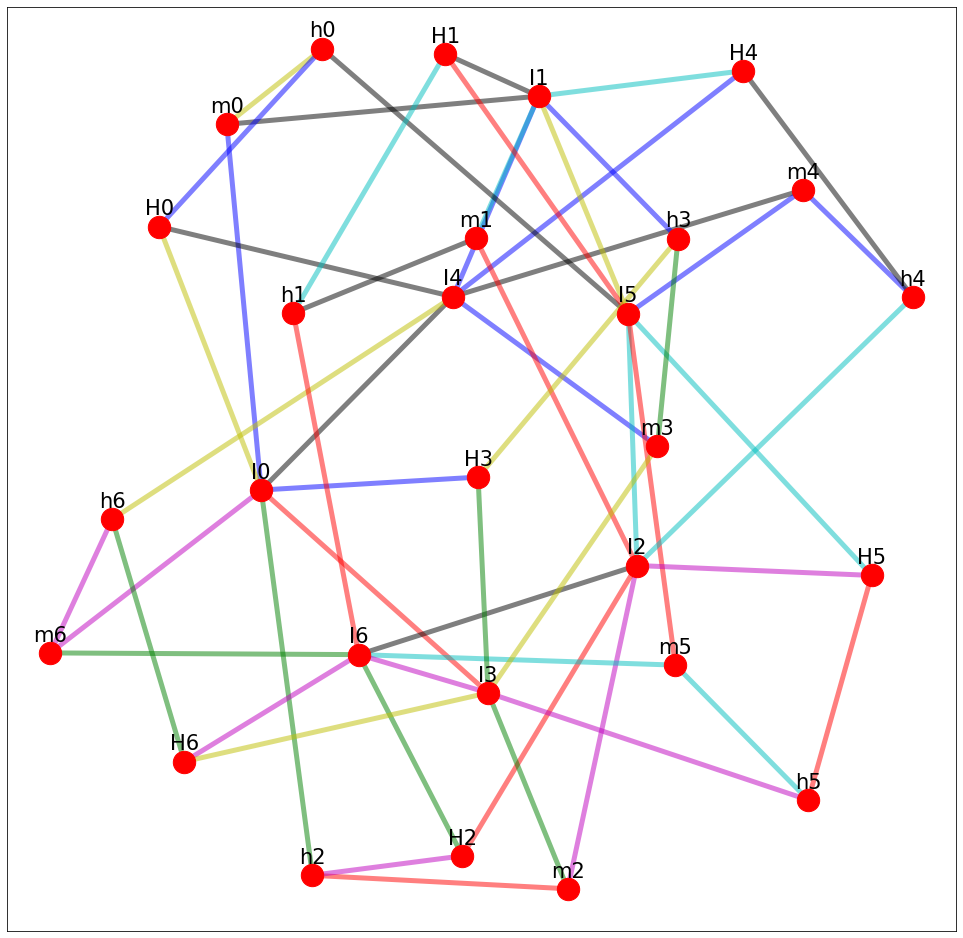

In [20]:
pos = nx.spring_layout(G)
generator_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
edge_colors = [generator_colors[data[2]['edge_label']] for data in G.edges.data()]
nx.draw_networkx_nodes(
    G,
    pos,
    node_color="r",
    node_size=500,
)
node_labels = {node: f"{['I', 'm', 'H', 'h'][node[0]]}{node[1]}" for node in G.nodes}
nx.draw_networkx_labels(G, {key: (val[0], val[1]+0.04) for key, val in pos.items()}, node_labels, font_size=21)
nx.draw_networkx_edges(
    G,
    pos,
    width=5,
    alpha=0.5,
    edge_color=edge_colors,
)
plt.show()

In [13]:
len(G.nodes)

28